# Non Deep Learning


To  explain non Deep Learning one must first know what Deep Learning is. Deep Learning models are models that learn 'autonomously'. This is possible thanks to the way they are built and programmed. 

Non Deep Learning models therefore describe the models where you have to make the adjustments yourself. Non Deep Learning models are less complex in their structure and are simpler than the Deep Learning models.

Non Deep Learning models have certain characteristics which distinguish them from Deep Learning models. One would be the simpler architecture of the models and their simpler structure. The second would be that in non Deep Learning models Feature Engineering plays a big role in how they perform. In general, the simpler models like Logistic Regression, Decision Tree or Random Forest are non Deep Learning models.

In this file we will use the two non Deep Learning models Random Forest and Support Vector Machines.

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import torch
import time

pd.set_option('display.max_columns', None) 

## 1. Data reading

All groups that were created in the preprocessing of the data were read in.

For all read-in data a short comment describing the group was entered. A detailed documentation about the groups and the preprocessing of the data can be found in the file 2_data_preprocessing. 

In [2]:
# group 1 - 4: train and test set have different users
# group 1: 400 time steps per window, without overlap
train_X1 = torch.load('../Daten/group_1/train_X.pt').float()
test_X1 = torch.load('../Daten/group_1/test_X.pt').float()
train_y1 = torch.load('../Daten/group_1/train_y.pt').long()
test_y1 = torch.load('../Daten/group_1/test_y.pt').long()

# group 2: 400 time steps per window, with 50% overlap
train_X2 = torch.load('../Daten/group_2/train_X.pt').float()
test_X2 = torch.load('../Daten/group_2/test_X.pt').float()
train_y2 = torch.load('../Daten/group_2/train_y.pt').long()
test_y2 = torch.load('../Daten/group_2/test_y.pt').long()

# group 3: 200 time steps per window, without overlap
train_X3 = torch.load('../Daten/group_3/train_X.pt').float()
test_X3 = torch.load('../Daten/group_3/test_X.pt').float()
train_y3 = torch.load('../Daten/group_3/train_y.pt').long()
test_y3 = torch.load('../Daten/group_3/test_y.pt').long()

# group 4: 200 time steps per window, with 50% overlap
train_X4 = torch.load('../Daten/group_4/train_X.pt').float()
test_X4 = torch.load('../Daten/group_4/test_X.pt').float()
train_y4 = torch.load('../Daten/group_4/train_y.pt').long()
test_y4 = torch.load('../Daten/group_4/test_y.pt').long()

# group 5 - 8: train and test set have same users
# group 5: 400 time steps per window, without overlap
train_X5 = torch.load('../Daten/group_5/train_X.pt').float()
test_X5 = torch.load('../Daten/group_5/test_X.pt').float()
train_y5 = torch.load('../Daten/group_5/train_y.pt').long()
test_y5 = torch.load('../Daten/group_5/test_y.pt').long()

# group 6: 400 time steps per window, with 50% overlap
train_X6 = torch.load('../Daten/group_6/train_X.pt').float()
test_X6 = torch.load('../Daten/group_6/test_X.pt').float()
train_y6 = torch.load('../Daten/group_6/train_y.pt').long()
test_y6 = torch.load('../Daten/group_6/test_y.pt').long()

# group 7: 200 time steps per window, without overlap
train_X7 = torch.load('../Daten/group_7/train_X.pt').float()
test_X7 = torch.load('../Daten/group_7/test_X.pt').float()
train_y7 = torch.load('../Daten/group_7/train_y.pt').long()
test_y7 = torch.load('../Daten/group_7/test_y.pt').long()

# group 8: 200 time steps per window, with 50% overlap
train_X8 = torch.load('../Daten/group_8/train_X.pt').float()
test_X8 = torch.load('../Daten/group_8/test_X.pt').float()
train_y8 = torch.load('../Daten/group_8/train_y.pt').long()
test_y8 = torch.load('../Daten/group_8/test_y.pt').long()

# group 9 - 12: train and test set have different users with maximal window size
# group 9: 400 time steps per window, without overlap
train_X9 = torch.load('../Daten/group_9/train_X.pt').float()
test_X9 = torch.load('../Daten/group_9/test_X.pt').float()
train_y9 = torch.load('../Daten/group_9/train_y.pt').long()
test_y9 = torch.load('../Daten/group_9/test_y.pt').long()

# group 10: 400 time steps per window, with 50% overlap
train_X10 = torch.load('../Daten/group_10/train_X.pt').float()
test_X10 = torch.load('../Daten/group_10/test_X.pt').float()
train_y10 = torch.load('../Daten/group_10/train_y.pt').long()
test_y10 = torch.load('../Daten/group_10/test_y.pt').long()

# group 11: 200 time steps per window, without overlap
train_X11 = torch.load('../Daten/group_11/train_X.pt').float()
test_X11 = torch.load('../Daten/group_11/test_X.pt').float()
train_y11 = torch.load('../Daten/group_11/train_y.pt').long()
test_y11 = torch.load('../Daten/group_11/test_y.pt').long()

# group 12: 200 time steps per window, with 50% overlap
train_X12 = torch.load('../Daten/group_12/train_X.pt').float()
test_X12 = torch.load('../Daten/group_12/test_X.pt').float()
train_y12 = torch.load('../Daten/group_12/train_y.pt').long()
test_y12 = torch.load('../Daten/group_12/test_y.pt').long()

# group 13 - 16: train and test set have same users with maximal window size
# group 13: 400 time steps per window, without overlap
train_X13 = torch.load('../Daten/group_13/train_X.pt').float()
test_X13 = torch.load('../Daten/group_13/test_X.pt').float()
train_y13 = torch.load('../Daten/group_13/train_y.pt').long()
test_y13 = torch.load('../Daten/group_13/test_y.pt').long()

# group 14: 400 time steps per window, with 50% overlap
train_X14 = torch.load('../Daten/group_14/train_X.pt').float()
test_X14 = torch.load('../Daten/group_14/test_X.pt').float()
train_y14 = torch.load('../Daten/group_14/train_y.pt').long()
test_y14 = torch.load('../Daten/group_14/test_y.pt').long()

# group 15: 200 time steps per window, without overlap
train_X15 = torch.load('../Daten/group_15/train_X.pt').float()
test_X15 = torch.load('../Daten/group_15/test_X.pt').float()
train_y15 = torch.load('../Daten/group_15/train_y.pt').long()
test_y15 = torch.load('../Daten/group_15/test_y.pt').long()

# group 16: 200 time steps per window, with 50% overlap
train_X16 = torch.load('../Daten/group_16/train_X.pt').float()
test_X16 = torch.load('../Daten/group_16/test_X.pt').float()
train_y16 = torch.load('../Daten/group_16/train_y.pt').long()
test_y16 = torch.load('../Daten/group_16/test_y.pt').long()

# group 17-18: 6 users in trainset, the seven-th user in testset  
# group 17: 200 time steps per window, with 50% overlap with 16 windows per record
train_X17 = torch.load('../Daten/group_17/train_X.pt').float()
test_X17 = torch.load('../Daten/group_17/test_X.pt').float()
train_y17 = torch.load('../Daten/group_17/train_y.pt').long()
test_y17 = torch.load('../Daten/group_17/test_y.pt').long()

# group 18: 200 time steps per window, with 50% overlap as many windows as possible per record
train_X18 = torch.load('../Daten/group_18/train_X.pt').float()
test_X18 = torch.load('../Daten/group_18/test_X.pt').float()
train_y18 = torch.load('../Daten/group_18/train_y.pt').long()
test_y18 = torch.load('../Daten/group_18/test_y.pt').long()

To transform the data from torch to a numpy array so it can be used for non Deep Learning models the functions get_numpy() will be used. And a first feature engeeniring will be done where the mean, standard deviation, min and max values of the variables will be calculated and given back as a numpy array.

In [3]:
def extract_features(data):
    features = []   
    # Compute statistical features
    mean = np.mean(data, axis=1)
    std_dev = np.std(data, axis=1)
    min_value = np.min(data, axis=1)
    max_value = np.max(data, axis=1)
    
    # Combine all features into a single array
    features = np.column_stack((mean, std_dev, min_value, max_value))
    return features

def get_numpy(data, get_total=True):
    data_np = data.double().numpy()
    if len(data_np.shape) >= 2:
        data_np = extract_features(data_np)
        df_data = pd.DataFrame(data_np)
        df_sta = pd.DataFrame()
        calc = df_data.shape[1]+1
        if get_total:
            for i in range(0, df_data.shape[1], 3):
                x = df_data[i]**2
                y = df_data[i+1]**2
                z = df_data[i+2]**2
                df_sta[calc] = np.sqrt(x+y+z)
                calc += 1
            #concatenate the dataframes
            data_np = pd.concat([df_data, df_sta], axis=1)
    return data_np


In the following, all data are converted into numpy arrays and the corresponding Feature Engineering is applied.

In the function get_numpy() there is the possibility not to calculate the different axes of the sensors together. This is because we want to check if the transformation really supports the model.

In [4]:
X_1_train = get_numpy(train_X1)
X_1_test = get_numpy(test_X1)
y_1_train = get_numpy(train_y1)
y_1_test = get_numpy(test_y1)

X_2_train = get_numpy(train_X2)
X_2_test = get_numpy(test_X2)
y_2_train = get_numpy(train_y2)
y_2_test = get_numpy(test_y2)

X_3_train = get_numpy(train_X3)
X_3_test = get_numpy(test_X3)
y_3_train = get_numpy(train_y3)
y_3_test = get_numpy(test_y3)

X_4_train = get_numpy(train_X4)
X_4_test = get_numpy(test_X4)
y_4_train = get_numpy(train_y4)
y_4_test = get_numpy(test_y4)

X_5_train = get_numpy(train_X5)
X_5_test = get_numpy(test_X5)
y_5_train = get_numpy(train_y5)
y_5_test = get_numpy(test_y5)

X_6_train = get_numpy(train_X6)
X_6_test = get_numpy(test_X6)
y_6_train = get_numpy(train_y6)
y_6_test = get_numpy(test_y6)

X_7_train = get_numpy(train_X7)
X_7_test = get_numpy(test_X7)
y_7_train = get_numpy(train_y7)
y_7_test = get_numpy(test_y7)

X_8_train = get_numpy(train_X8)
X_8_test = get_numpy(test_X8)
y_8_train = get_numpy(train_y8)
y_8_test = get_numpy(test_y8)

X_9_train = get_numpy(train_X9)
X_9_test = get_numpy(test_X9)
y_9_train = get_numpy(train_y9)
y_9_test = get_numpy(test_y9)

X_10_train = get_numpy(train_X10)
X_10_test = get_numpy(test_X10)
y_10_train = get_numpy(train_y10)
y_10_test = get_numpy(test_y10)

X_11_train = get_numpy(train_X11)
X_11_test = get_numpy(test_X11)
y_11_train = get_numpy(train_y11)
y_11_test = get_numpy(test_y11)

X_12_train = get_numpy(train_X12)
X_12_test = get_numpy(test_X12)
y_12_train = get_numpy(train_y12)
y_12_test = get_numpy(test_y12)

X_13_train = get_numpy(train_X13)
X_13_test = get_numpy(test_X13)
y_13_train = get_numpy(train_y13)
y_13_test = get_numpy(test_y13)

X_14_train = get_numpy(train_X14)
X_14_test = get_numpy(test_X14)
y_14_train = get_numpy(train_y14)
y_14_test = get_numpy(test_y14)

X_15_train = get_numpy(train_X15)
X_15_test = get_numpy(test_X15)
y_15_train = get_numpy(train_y15)
y_15_test = get_numpy(test_y15)

X_16_train = get_numpy(train_X16)
X_16_test = get_numpy(test_X16)
y_16_train = get_numpy(train_y16)
y_16_test = get_numpy(test_y16)

X_17_train = get_numpy(train_X17)
X_17_test = get_numpy(test_X17)
y_17_train = get_numpy(train_y17)
y_17_test = get_numpy(test_y17)

X_18_train = get_numpy(train_X18)
X_18_test = get_numpy(test_X18)
y_18_train = get_numpy(train_y18)
y_18_test = get_numpy(test_y18)

In [5]:
#read all groups as numpy with get_numpy but without total
X_1_train_false = get_numpy(train_X1, get_total=False)
X_1_test_false = get_numpy(test_X1, get_total=False)
y_1_train_false = get_numpy(train_y1, get_total=False)
y_1_test_false = get_numpy(test_y1, get_total=False)

X_2_train_false = get_numpy(train_X2, get_total=False)
X_2_test_false = get_numpy(test_X2, get_total=False)
y_2_train_false = get_numpy(train_y2, get_total=False)
y_2_test_false = get_numpy(test_y2, get_total=False)

X_3_train_false = get_numpy(train_X3, get_total=False)
X_3_test_false = get_numpy(test_X3, get_total=False)
y_3_train_false = get_numpy(train_y3, get_total=False)
y_3_test_false = get_numpy(test_y3, get_total=False)

X_4_train_false = get_numpy(train_X4, get_total=False)
X_4_test_false = get_numpy(test_X4, get_total=False)
y_4_train_false = get_numpy(train_y4, get_total=False)
y_4_test_false = get_numpy(test_y4, get_total=False)

X_5_train_false = get_numpy(train_X5, get_total=False)
X_5_test_false = get_numpy(test_X5, get_total=False)
y_5_train_false = get_numpy(train_y5, get_total=False)
y_5_test_false = get_numpy(test_y5, get_total=False)

X_6_train_false = get_numpy(train_X6, get_total=False)
X_6_test_false = get_numpy(test_X6, get_total=False)
y_6_train_false = get_numpy(train_y6, get_total=False)
y_6_test_false = get_numpy(test_y6, get_total=False)

X_7_train_false = get_numpy(train_X7, get_total=False)
X_7_test_false = get_numpy(test_X7, get_total=False)
y_7_train_false = get_numpy(train_y7, get_total=False)
y_7_test_false = get_numpy(test_y7, get_total=False)

X_8_train_false = get_numpy(train_X8, get_total=False)
X_8_test_false = get_numpy(test_X8, get_total=False)
y_8_train_false = get_numpy(train_y8, get_total=False)
y_8_test_false = get_numpy(test_y8, get_total=False)

X_9_train_false = get_numpy(train_X9, get_total=False)
X_9_test_false = get_numpy(test_X9, get_total=False)
y_9_train_false = get_numpy(train_y9, get_total=False)
y_9_test_false = get_numpy(test_y9, get_total=False)

X_10_train_false = get_numpy(train_X10, get_total=False)
X_10_test_false = get_numpy(test_X10, get_total=False)
y_10_train_false = get_numpy(train_y10, get_total=False)
y_10_test_false = get_numpy(test_y10, get_total=False)

X_11_train_false = get_numpy(train_X11, get_total=False)
X_11_test_false = get_numpy(test_X11, get_total=False)
y_11_train_false = get_numpy(train_y11, get_total=False)
y_11_test_false = get_numpy(test_y11, get_total=False)

X_12_train_false = get_numpy(train_X12, get_total=False)
X_12_test_false = get_numpy(test_X12, get_total=False)
y_12_train_false = get_numpy(train_y12, get_total=False)
y_12_test_false = get_numpy(test_y12, get_total=False)

X_13_train_false = get_numpy(train_X13, get_total=False)
X_13_test_false = get_numpy(test_X13, get_total=False)
y_13_train_false = get_numpy(train_y13, get_total=False)
y_13_test_false = get_numpy(test_y13, get_total=False)

X_14_train_false = get_numpy(train_X14, get_total=False)
X_14_test_false = get_numpy(test_X14, get_total=False)
y_14_train_false = get_numpy(train_y14, get_total=False)
y_14_test_false = get_numpy(test_y14, get_total=False)

X_15_train_false = get_numpy(train_X15, get_total=False)
X_15_test_false = get_numpy(test_X15, get_total=False)
y_15_train_false = get_numpy(train_y15, get_total=False)
y_15_test_false = get_numpy(test_y15, get_total=False)

X_16_train_false = get_numpy(train_X16, get_total=False)
X_16_test_false = get_numpy(test_X16, get_total=False)
y_16_train_false = get_numpy(train_y16, get_total=False)
y_16_test_false = get_numpy(test_y16, get_total=False)

X_17_train_false = get_numpy(train_X17, get_total=False)
X_17_test_false = get_numpy(test_X17, get_total=False)
y_17_train_false = get_numpy(train_y17, get_total=False)
y_17_test_false = get_numpy(test_y17, get_total=False)

X_18_train_false = get_numpy(train_X18, get_total=False)
X_18_test_false = get_numpy(test_X18, get_total=False)
y_18_train_false = get_numpy(train_y18, get_total=False)
y_18_test_false = get_numpy(test_y18, get_total=False)

In [6]:
print("Shape of X_1_train", X_1_train.shape)
print("Shape of X_1_train_false", X_1_train_false.shape)

Shape of X_1_train (744, 64)
Shape of X_1_train_false (744, 48)


After the data has been converted into a numpy array and the appropriate transformations have been performed. All related train and test sets are stored in a list which is used for applying the models.

In [7]:
all_features = [[X_1_train, X_1_test, y_1_train, y_1_test], [X_2_train, X_2_test, y_2_train, y_2_test], [X_3_train, X_3_test, y_3_train, y_3_test], 
                [X_4_train, X_4_test, y_4_train, y_4_test], [X_5_train, X_5_test, y_5_train, y_5_test], [X_6_train, X_6_test, y_6_train, y_6_test], 
                [X_7_train, X_7_test, y_7_train, y_7_test], [X_8_train, X_8_test, y_8_train, y_8_test], [X_9_train, X_9_test, y_9_train, y_9_test], 
                [X_10_train, X_10_test, y_10_train, y_10_test], [X_11_train, X_11_test, y_11_train, y_11_test], 
                [X_12_train, X_12_test, y_12_train, y_12_test], [X_13_train, X_13_test, y_13_train, y_13_test], 
                [X_14_train, X_14_test, y_14_train, y_14_test], [X_15_train, X_15_test, y_15_train, y_15_test], 
                [X_16_train, X_16_test, y_16_train, y_16_test], [X_17_train, X_17_test, y_17_train, y_17_test], 
                [X_18_train, X_18_test, y_18_train, y_18_test]]
not_all_features = [[X_1_train_false, X_1_test_false, y_1_train_false, y_1_test_false], [X_2_train_false, X_2_test_false, y_2_train_false, y_2_test_false], 
                    [X_3_train_false, X_3_test_false, y_3_train_false, y_3_test_false], [X_4_train_false, X_4_test_false, y_4_train_false, y_4_test_false], 
                    [X_5_train_false, X_5_test_false, y_5_train_false, y_5_test_false], [X_6_train_false, X_6_test_false, y_6_train_false, y_6_test_false], 
                    [X_7_train_false, X_7_test_false, y_7_train_false, y_7_test_false], [X_8_train_false, X_8_test_false, y_8_train_false, y_8_test_false], 
                    [X_9_train_false, X_9_test_false, y_9_train_false, y_9_test_false], [X_10_train_false, X_10_test_false, y_10_train_false, y_10_test_false], 
                    [X_11_train_false, X_11_test_false, y_11_train_false, y_11_test_false], [X_12_train_false, X_12_test_false, y_12_train_false, y_12_test_false], 
                    [X_13_train_false, X_13_test_false, y_13_train_false, y_13_test_false], [X_14_train_false, X_14_test_false, y_14_train_false, y_14_test_false], 
                    [X_15_train_false, X_15_test_false, y_15_train_false, y_15_test_false], [X_16_train_false, X_16_test_false, y_16_train_false, y_16_test_false], 
                    [X_17_train_false, X_17_test_false, y_17_train_false, y_17_test_false], [X_18_train_false, X_18_test_false, y_18_train_false, y_18_test_false]]

In [8]:
print("Shape of X_1_train from list", all_features[0][0].shape)
print("Shape of X_1_train_false from list", not_all_features[0][0].shape)


Shape of X_1_train from list (744, 64)
Shape of X_1_train_false from list (744, 48)


The shapes of these two records were output to check if they were stored correctly in the list.

## 2. Random Forest Classifier


Random Forest combines several decision trees and makes the decision based on them.

To explain this in more detail, we will take a closer look at the Random Forest Classifier.

As already mentioned, this consists of several decision trees. In each of these decision trees, random features are given to split the nodes. By this precondition the model tries to prevent overfitting by not considering any feature as more important for the decision. 

The classification made by the Random Forest in our case is decided as follows. Each decision tree is trained, after all decision trees are trained, each decision tree in the Random Forest will make a prediction. The model then takes the prediction that occurred the most often.

### 2.1 Check of Datasets

To check which datasets perform better on a default model, a function is written that returns the average of the accuracy of all trained and tested data. 

Afterwards the mean values are compared and the dataset which performs better is taken.

In [9]:
rdf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

def check_accuracy(features):
    '''
    This function takes in a list of features and returns the mean accuracy of the training and test sets
        
    '''
    accuracy_test = []
    accuracy_train = []
    for feature in features:
        rdf.fit(feature[0], feature[2])
        pred_train = rdf.predict(feature[0])
        pred_test = rdf.predict(feature[1])
        accuracy_train.append(accuracy_score(feature[2], pred_train))
        accuracy_test.append(accuracy_score(feature[3], pred_test))
    return np.mean(accuracy_train), np.mean(accuracy_test)

In [10]:
sensors_calculated = check_accuracy(all_features)
sensors_not_calculated = check_accuracy(not_all_features)

In [11]:
print("Train accuracy with axis calculated together for all sensors: ", sensors_calculated[0])
print("Test accuracy with axis calculated together for all sensors: ", sensors_calculated[1])

Train accuracy with axis calculated together for all sensors:  0.8541255816090927
Test accuracy with axis calculated together for all sensors:  0.6064367948639036


In [12]:
print("Train accuracy with axis not calculated together for all sensors: ", sensors_not_calculated[0])
print("Test accuracy with axis not calculated together for all sensors: ", sensors_not_calculated[1])

Train accuracy with axis not calculated together for all sensors:  0.8615839253945947
Test accuracy with axis not calculated together for all sensors:  0.6437633907349096


The mean values of the accuracies over all groups show that the model which uses the data which does not calculate the different axes of the sensors together performs better than the model which calculates the axes together.

A function is created which fits the list of training and test data and stores the accuracies.

In [13]:
rdf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
def get_scores(features, model):
    '''
    This function takes in a list of features and a model and returns the accuracy of the training and test sets
    as well as the time it takes to train and test the model
    '''

    train_accuracy = []
    test_accuracy = []
    group = 1
    for feature in features:
        # Time the training
        start_train = time.time()
        model.fit(feature[0], feature[2])
        end_train = time.time()

        # Make predictions and calculate train accuracy
        y_train_pred = model.predict(feature[0])
        train_accuracy_gr = accuracy_score(feature[2], y_train_pred)
        print("Group ", group)
        print("Train accuracy: {:.2f}%".format(train_accuracy_gr * 100))
        # Make predictions and calculate accuracy
        # Time the testing
        start = time.time()
        y_pred = model.predict(feature[1])
        end = time.time()
        accuracy = accuracy_score(feature[3], y_pred)
        print("Test accuracy: {:.2f}%".format(accuracy * 100))
        print("Time to train: ", np.round((end_train - start_train), 3), "seconds")
        print("Time to test: ", np.round((end - start), 3), "seconds")
        train_accuracy.append(train_accuracy_gr)
        test_accuracy.append(accuracy)
        group += 1
    return train_accuracy, test_accuracy

In [14]:
train_accuracy, test_accuracy = get_scores(not_all_features, rdf)

Group  1
Train accuracy: 87.63%
Test accuracy: 42.50%
Time to train:  0.188 seconds
Time to test:  0.01 seconds
Group  2
Train accuracy: 90.26%
Test accuracy: 46.00%
Time to train:  0.201 seconds
Time to test:  0.009 seconds
Group  3
Train accuracy: 85.08%
Test accuracy: 45.75%
Time to train:  0.193 seconds
Time to test:  0.009 seconds
Group  4
Train accuracy: 84.11%
Test accuracy: 45.00%
Time to train:  0.324 seconds
Time to test:  0.012 seconds
Group  5
Train accuracy: 82.75%
Test accuracy: 85.42%
Time to train:  0.136 seconds
Time to test:  0.008 seconds
Group  6
Train accuracy: 83.90%
Test accuracy: 77.08%
Time to train:  0.175 seconds
Time to test:  0.009 seconds
Group  7
Train accuracy: 83.41%
Test accuracy: 77.08%
Time to train:  0.17 seconds
Time to test:  0.009 seconds
Group  8
Train accuracy: 80.15%
Test accuracy: 76.04%
Time to train:  0.27 seconds
Time to test:  0.011 seconds
Group  9
Train accuracy: 89.37%
Test accuracy: 34.53%
Time to train:  0.654 seconds
Time to test:  

In [15]:
# Train and test accuracy to dataframe
train_accuracy_table = pd.DataFrame(train_accuracy)
train_accuracy_table.columns = ['Train Accuracy']
train_accuracy_table['group'] = train_accuracy_table.index + 1
test_accuracy_table = pd.DataFrame(test_accuracy)
test_accuracy_table.columns = ['Test Accuracy']
test_accuracy_table['group'] = test_accuracy_table.index + 1

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_table['group'], train_accuracy_table['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table['group'], test_accuracy_table['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for Random Forest')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

In the plot you can see the test and train accuracy line. You can see that in the groups 5, 15 and 16 the test values exceed the training values, which is not possible, because the train accuracy must always be greater than the test accuracy. In general, you can see that the groups which contain measurements from all users in the train as well as in the test data, perform better than the groups which define the measurements from one user as a test set. 

Groups that have the measurements of one user defined as a test set perform differently. Groups 17 and 18 which have an additional user representing the test set alone perform better than groups 1-4 and 9-12 which have 6 users in the training set and one as test set.

### 2.2 GridSearch Random Forest
GridSearch is a technique to find the best parameters for the model to be optimized.

For this purpose, the parameters that you want to optimize are defined beforehand. The defined parameters are entered individually into the model by using the GridSearch. Every possible combination of the defined parameters is fitted. The models are evaluated by using cross validation to evaluate the performance and determined which model and parameter perform best.


A GridSearch is performed on our Random Forest model. For this purpose, group 8 is used, since it has a low train accuracy value in the plot and the difference between the test and train accuracy is not so large.

In [17]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 4, 6, 8, 10],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = rdf, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2, return_train_score=True, scoring='accuracy')       
grid_search.fit(X_8_train_false, y_8_train_false)
grid_search.best_params_
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


The parameters of the GridSearch mean:
- Bootstrap the Random Forest trains the decision trees on a random subset of the data. With this all decision trees are training on a random subset and can perform better.

- max_depth is the maximum depth of the tree, so the maximum number of nodes of the tree.

- max_features is the maximum number of features that are considered in when a split is done.

- min_sample_leaf the minimum number of samples required to be at a leaf node.

- min_sample_split the minimum number of sample to split an node.

- n_estimators the number of trees in the forest.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [18]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, random_state=42)
0.9937839937839938


In [19]:
rdf_gd = RandomForestClassifier(bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=42)
train_accuracy_gd, test_accuracy_gd = get_scores(not_all_features, rdf_gd)

Group  1
Train accuracy: 99.87%
Test accuracy: 41.00%
Time to train:  0.264 seconds
Time to test:  0.013 seconds
Group  2
Train accuracy: 100.00%
Test accuracy: 43.00%
Time to train:  0.25 seconds
Time to test:  0.024 seconds
Group  3
Train accuracy: 99.66%
Test accuracy: 30.50%
Time to train:  0.247 seconds
Time to test:  0.012 seconds
Group  4
Train accuracy: 99.93%
Test accuracy: 36.38%
Time to train:  0.372 seconds
Time to test:  0.015 seconds
Group  5
Train accuracy: 100.00%
Test accuracy: 99.31%
Time to train:  0.153 seconds
Time to test:  0.01 seconds
Group  6
Train accuracy: 100.00%
Test accuracy: 98.26%
Time to train:  0.205 seconds
Time to test:  0.012 seconds
Group  7
Train accuracy: 100.00%
Test accuracy: 97.57%
Time to train:  0.2 seconds
Time to test:  0.011 seconds
Group  8
Train accuracy: 99.84%
Test accuracy: 98.78%
Time to train:  0.308 seconds
Time to test:  0.015 seconds
Group  9
Train accuracy: 99.85%
Test accuracy: 34.73%
Time to train:  0.686 seconds
Time to test

In [20]:
# Train and test accuracy to dataframe
train_accuracy_table_gd = pd.DataFrame(train_accuracy_gd)
train_accuracy_table_gd.columns = ['Train Accuracy']
train_accuracy_table_gd['group'] = train_accuracy_table_gd.index + 1
test_accuracy_table_gd = pd.DataFrame(test_accuracy_gd)
test_accuracy_table_gd.columns = ['Test Accuracy']
test_accuracy_table_gd['group'] = test_accuracy_table_gd.index + 1

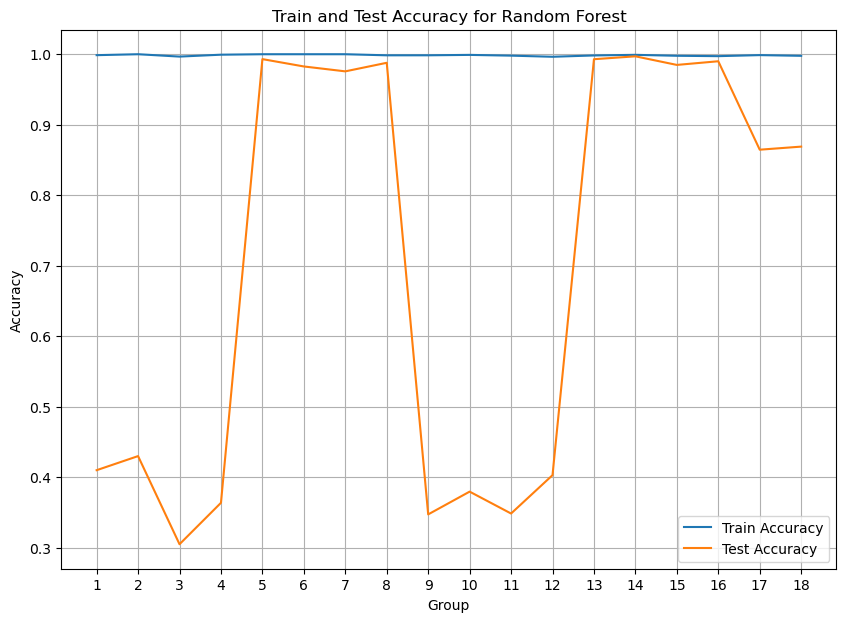

In [21]:
#Plot accuracies and mark the group with smallest difference between train and test accuracy
plt.figure(figsize=(10,7))
plt.plot(train_accuracy_table_gd['group'], train_accuracy_table_gd['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table_gd['group'], test_accuracy_table_gd['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for Random Forest')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

It can be seen that the training data all perform equally well around 99%. The test data looks different again. The groups with the independent test user perform significantly worse than in the training data, there is an overfitting. In the data where the measurements are mixed, it can be seen that they all perform well above 90%. The group with the maximum window size (13-16) even performs almost perfect. 

It is interesting to see that groups 17 and 18 which have an additional user as test set also perform very well by 85% on the training data.

### 2.3 Testing Random state

The differences between the individual groups that perform well are minimal. However, to check whether the random_state parameter for the model has an influence on the results, 5 random states are initialized and plotted.

Typically, the split of the train and test set should also be examined, since these also have an influence on the performance. However, not all of our groups have a test/train split because in some groups a single user is defined as a test set, this is not examined here. The test/train split can have a big impact on the performance of the model on the respective group.

In [22]:
np.random.seed(42)
#Get 5 random values
random_values = []
for i in range(5):
    random_values.append(np.random.randint(100))
random_values

[51, 92, 14, 71, 60]

In [23]:
count = 1
for rand in random_values:
    rdf_rand = rdf_gd = RandomForestClassifier(bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=rand)
    train_accuracy_rand, test_accuracy_rand = get_scores(not_all_features, rdf_rand)
    #Get table of accuracies
    #Get dataframe with one row and 10 columns
    if count == 1:
        table_accuracy_rand = pd.DataFrame(train_accuracy_rand)
        table_accuracy_rand.columns = ['Train Accuracy '+str(count)]
        table_accuracy_rand['Test Accuracy '+str(count)] = test_accuracy_rand
        table_accuracy_rand['group'] = table_accuracy_rand.index + 1
        count += 1
    else:
        table_accuracy_rand['Train Accuracy '+str(count)] = train_accuracy_rand
        table_accuracy_rand['Test Accuracy '+str(count)] = test_accuracy_rand

        count += 1

Group  1
Train accuracy: 99.87%
Test accuracy: 35.50%
Time to train:  0.168 seconds
Time to test:  0.009 seconds
Group  2
Train accuracy: 100.00%
Test accuracy: 33.75%
Time to train:  0.188 seconds
Time to test:  0.011 seconds
Group  3
Train accuracy: 99.80%
Test accuracy: 31.25%
Time to train:  0.186 seconds
Time to test:  0.01 seconds
Group  4
Train accuracy: 99.93%
Test accuracy: 33.62%
Time to train:  0.292 seconds
Time to test:  0.013 seconds
Group  5
Train accuracy: 100.00%
Test accuracy: 99.31%
Time to train:  0.127 seconds
Time to test:  0.009 seconds
Group  6
Train accuracy: 100.00%
Test accuracy: 98.26%
Time to train:  0.163 seconds
Time to test:  0.011 seconds
Group  7
Train accuracy: 99.92%
Test accuracy: 96.18%
Time to train:  0.168 seconds
Time to test:  0.013 seconds
Group  8
Train accuracy: 99.88%
Test accuracy: 98.44%
Time to train:  0.275 seconds
Time to test:  0.016 seconds
Group  9
Train accuracy: 99.85%
Test accuracy: 38.72%
Time to train:  0.753 seconds
Time to te

In [24]:
table_accuracy_rand

Train Accuracy 1  Test Accuracy 1  group  Train Accuracy 2  \
0           0.998656         0.355000      1          0.997312   
1           1.000000         0.337500      2          1.000000   
2           0.997984         0.312500      3          0.995968   
3           0.999328         0.336250      4          0.998992   
4           1.000000         0.993056      5          1.000000   
5           1.000000         0.982639      6          1.000000   
6           0.999187         0.961806      7          0.999187   
7           0.998834         0.984375      8          0.998057   
8           0.998474         0.387226      9          0.998856   
9           0.999105         0.348980     10          0.999361   
10          0.998547         0.401942     11          0.996148   
11          0.996455         0.411302     12          0.995854   
12          0.998252         0.991745     13          0.998093   
13          0.998401         0.997020     14          0.997201   
14          0.998338         0.983664     15          0.998575   
15          0.996380         0.988856     16          0.996340   
16          0.998422         0.822917     17          0.998422   
17          0.996360         0.851852     18          0.997563   

    Test Accuracy 2  Train Accuracy 3  Test Accuracy 3  Train Accuracy 4  \
0          0.460000          0.997312         0.455000          0.997312   
1          0.455000          1.000000         0.455000          1.000000   
2          0.460000          0.995968         0.312500          0.996640   
3          0.447500          0.999328         0.398750          0.999328   
4          0.979167          1.000000         0.986111          1.000000   
5          0.965278          1.000000         0.986111          0.999187   
6          0.968750          1.000000         0.972222          0.999187   
7          0.980903          0.998057         0.987847          0.998057   
8          0.445110          0.998856         0.273453          0.998983   
9          0.414286          0.998978         0.405102          0.999041   
10         0.439806          0.997916         0.432039          0.997853   
11         0.422113          0.997721         0.424570          0.996772   
12         0.992925          0.999364         0.994104          0.998093   
13         0.997020          0.998480         0.997616          0.998800   
14         0.984831          0.997309         0.983664          0.996597   
15         0.990323          0.997136         0.990029          0.996102   
16         0.833333          0.997159         0.875000          0.998737   
17         0.874644          0.997595         0.867521          0.996202   

    Test Accuracy 4  Train Accuracy 5  Test Accuracy 5  
0          0.380000          0.997312         0.435000  
1          0.455000          1.000000         0.415000  
2          0.280000          0.996640         0.305000  
3          0.322500          0.998992         0.351250  
4          0.993056          1.000000         0.993056  
5          0.979167          1.000000         0.972222  
6          0.958333          1.000000         0.968750  
7          0.982639          0.998057         0.987847  
8          0.281437          0.998602         0.337325  
9          0.261224          0.998978         0.352041  
10         0.419417          0.998358         0.385437  
11         0.413268          0.996962         0.430958  
12         0.991745          0.998729         0.991745  
13         0.998212          0.999280         0.997020  
14         0.983664          0.997863         0.982497  
15         0.990616          0.997971         0.989736  
16         0.848958          0.998737         0.828125  
17         0.877493          0.996329         0.866097

All accuracies of the different random states were entered into a table.

In [25]:
#Plot train accuracy
plt.figure(figsize=(10,7))
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 1'], label='Random state 1')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 2'], label='Random state 2')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 3'], label='Random state 3')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 4'], label='Random state 4')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 5'], label='Random state 5')
plt.title('Train Accuracy for Random Forest')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

You can see in the plot with the different random states for the train accuracy that the lines of all accuracies behave similarly. The range in which they differ is 0.004.

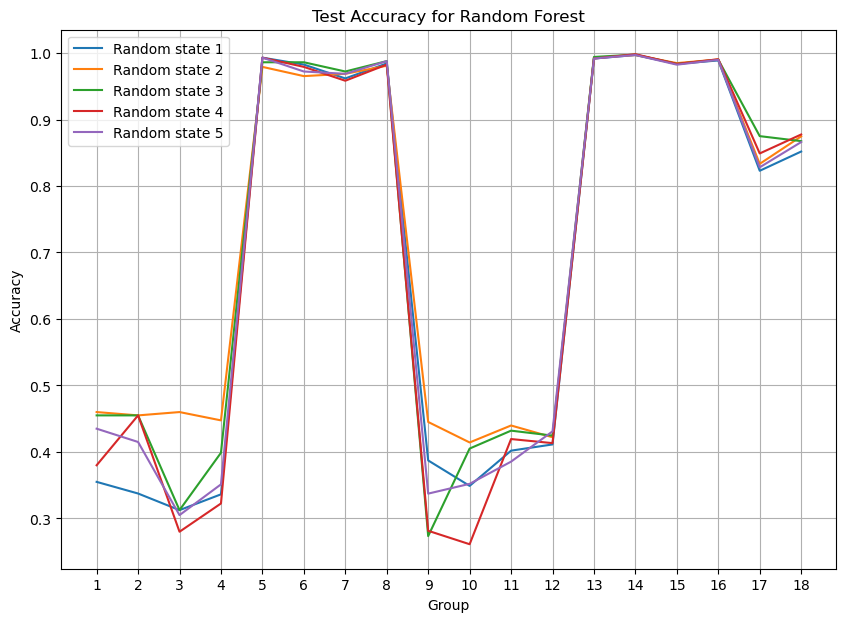

In [26]:
#Plot test accuracy
plt.figure(figsize=(10,7))
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 1'], label='Random state 1')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 2'], label='Random state 2')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 3'], label='Random state 3')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 4'], label='Random state 4')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 5'], label='Random state 5')
plt.title('Test Accuracy for Random Forest')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

In the plot with the different random states for the test accuracy it can be seen that these behave approximately the same independent of the random state. 

It is interesting that with random state 2 the values which are low (groups which have independent test person) are higher than with the other random states, the other groups then look similar again. 

#### 2.3.1 Results

Here we will fit and evaluate the best and worst groups for the corresponding model. To obtain a result that is independent of random state, we will sum up the accuracies of all random states per group and calculate the mean value. This is done for test and train accuracy.

In [27]:
#Get mean of train and test accuracy per group
table_accuracy_rand['Train Accuracy Mean'] = table_accuracy_rand[['Train Accuracy 1', 'Train Accuracy 2', 'Train Accuracy 3', 'Train Accuracy 4', 'Train Accuracy 5']].mean(axis=1)
table_accuracy_rand['Test Accuracy Mean'] = table_accuracy_rand[['Test Accuracy 1', 'Test Accuracy 2', 'Test Accuracy 3', 'Test Accuracy 4', 'Test Accuracy 5']].mean(axis=1)

In [28]:
table_accuracy_rand

Train Accuracy 1  Test Accuracy 1  group  Train Accuracy 2  \
0           0.998656         0.355000      1          0.997312   
1           1.000000         0.337500      2          1.000000   
2           0.997984         0.312500      3          0.995968   
3           0.999328         0.336250      4          0.998992   
4           1.000000         0.993056      5          1.000000   
5           1.000000         0.982639      6          1.000000   
6           0.999187         0.961806      7          0.999187   
7           0.998834         0.984375      8          0.998057   
8           0.998474         0.387226      9          0.998856   
9           0.999105         0.348980     10          0.999361   
10          0.998547         0.401942     11          0.996148   
11          0.996455         0.411302     12          0.995854   
12          0.998252         0.991745     13          0.998093   
13          0.998401         0.997020     14          0.997201   
14          0.998338         0.983664     15          0.998575   
15          0.996380         0.988856     16          0.996340   
16          0.998422         0.822917     17          0.998422   
17          0.996360         0.851852     18          0.997563   

    Test Accuracy 2  Train Accuracy 3  Test Accuracy 3  Train Accuracy 4  \
0          0.460000          0.997312         0.455000          0.997312   
1          0.455000          1.000000         0.455000          1.000000   
2          0.460000          0.995968         0.312500          0.996640   
3          0.447500          0.999328         0.398750          0.999328   
4          0.979167          1.000000         0.986111          1.000000   
5          0.965278          1.000000         0.986111          0.999187   
6          0.968750          1.000000         0.972222          0.999187   
7          0.980903          0.998057         0.987847          0.998057   
8          0.445110          0.998856         0.273453          0.998983   
9          0.414286          0.998978         0.405102          0.999041   
10         0.439806          0.997916         0.432039          0.997853   
11         0.422113          0.997721         0.424570          0.996772   
12         0.992925          0.999364         0.994104          0.998093   
13         0.997020          0.998480         0.997616          0.998800   
14         0.984831          0.997309         0.983664          0.996597   
15         0.990323          0.997136         0.990029          0.996102   
16         0.833333          0.997159         0.875000          0.998737   
17         0.874644          0.997595         0.867521          0.996202   

    Test Accuracy 4  Train Accuracy 5  Test Accuracy 5  Train Accuracy Mean  \
0          0.380000          0.997312         0.435000             0.997581   
1          0.455000          1.000000         0.415000             1.000000   
2          0.280000          0.996640         0.305000             0.996640   
3          0.322500          0.998992         0.351250             0.999194   
4          0.993056          1.000000         0.993056             1.000000   
5          0.979167          1.000000         0.972222             0.999837   
6          0.958333          1.000000         0.968750             0.999512   
7          0.982639          0.998057         0.987847             0.998213   
8          0.281437          0.998602         0.337325             0.998754   
9          0.261224          0.998978         0.352041             0.999093   
10         0.419417          0.998358         0.385437             0.997764   
11         0.413268          0.996962         0.430958             0.996753   
12         0.991745          0.998729         0.991745             0.998507   
13         0.998212          0.999280         0.997020             0.998433   
14         0.983664          0.997863         0.982497             0.997737   
15         0.990616          0.997971   

In [29]:
#Get best and worst test accuracy
display("Highest mean test accuracy:", table_accuracy_rand[table_accuracy_rand['Test Accuracy Mean'] == table_accuracy_rand['Test Accuracy Mean'].max()])
display("Lowest mean test accuracy:", table_accuracy_rand[table_accuracy_rand['Test Accuracy Mean'] == table_accuracy_rand['Test Accuracy Mean'].min()])

'Highest mean test accuracy:'

Train Accuracy 1  Test Accuracy 1  group  Train Accuracy 2  \
13          0.998401          0.99702     14          0.997201   

    Test Accuracy 2  Train Accuracy 3  Test Accuracy 3  Train Accuracy 4  \
13          0.99702           0.99848         0.997616            0.9988   

    Test Accuracy 4  Train Accuracy 5  Test Accuracy 5  Train Accuracy Mean  \
13         0.998212           0.99928          0.99702             0.998433   

    Test Accuracy Mean  
13            0.997378

'Lowest mean test accuracy:'

Train Accuracy 1  Test Accuracy 1  group  Train Accuracy 2  \
2          0.997984           0.3125      3          0.995968   

   Test Accuracy 2  Train Accuracy 3  Test Accuracy 3  Train Accuracy 4  \
2             0.46          0.995968           0.3125           0.99664   

   Test Accuracy 4  Train Accuracy 5  Test Accuracy 5  Train Accuracy Mean  \
2             0.28           0.99664            0.305              0.99664   

   Test Accuracy Mean  
2               0.334

The model performs best on test set when the group 14 has been trained and then tested. Although the GridSearch was performed with group 8.

The model performs worst with group 3. 

Now the models with the best and the worst group are trained and then the Confusion Matrixes are plotted.

In [30]:
#Display Train and Test Mean accuracy for best Group
display("Train and Test Mean accuracy for best Group:", table_accuracy_rand[table_accuracy_rand['Test Accuracy Mean'] == table_accuracy_rand['Test Accuracy Mean'].max()][['Train Accuracy Mean', 'Test Accuracy Mean', 'group']])

'Train and Test Mean accuracy for best Group:'

Train Accuracy Mean  Test Accuracy Mean  group
13             0.998433            0.997378     14

For the group which has the best test accuracy, the train accuracy was also output.

In [31]:
rdf_cm =  RandomForestClassifier(bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=42)

In [32]:
unique_labels = np.unique(y_14_train_false)
print(unique_labels)

[0. 1. 2. 3. 4. 5.]


As defined in the 2_data_preprocessing file, the encoded lables correspond to the following activities: ('Laufen', 0), ('Rennen', 1), ('Sitzen', 2), ('Stehen', 3), ('Treppenlaufen', 4) and ('Velofahren', 5).

So the labels are stored with the respective activity so that it can be better tracked in the Confusion Matrix.

In [33]:
unique_labels = ['Laufen', 'Rennen', 'Sitzen', 'Stehen', 'Treppenlaufen', 'Velofahren']

In [34]:
rdf_cm.fit(X_14_train_false, y_14_train_false)
y_pred_14 = rdf_cm.predict(X_14_test_false)
accuracy_14 = accuracy_score(y_14_test_false, y_pred_14)
cm_14 = confusion_matrix(y_14_test_false, y_pred_14)
df_cm_14 = pd.DataFrame(cm_14, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_14, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest of Group 14 (Accuracy: '+str(np.round(accuracy_14, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion Matrix shows that the predictions of the model are very good, few activities are predicted incorrectly.

The diagonal distribution of the predictions shows an optimal distribution in the Confusion Matrix.  

In [35]:
rdf_cm.fit(X_3_train_false, y_3_train_false)
y_pred_3 = rdf_cm.predict(X_3_test_false)
accuracy_3 = accuracy_score(y_3_test_false, y_pred_3)
cm_3 = confusion_matrix(y_3_test_false, y_pred_3)
df_cm_3 = pd.DataFrame(cm_3, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_3, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest of Group 3 (Accuracy: '+str(np.round(accuracy_3, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In the Confusion Matrix of group 3, it can be seen that the model incorrectly predicts many activities. One reason could be that the model has difficulty classifying the unknown test user because it has too little data. It is also noticeable that the test user did not record the activity 'Laufen' and does not predict it.  

Also interesting is that 'Stehen' is often predicted, although it is an activity that has little variation in the measurements as can be seen in the 1_data_understanding file.

In addition to the best and worst group, groups 17 and 18 will be shown in a Confusion Matrix. 

These two groups have one more user who has recorded all activities. This new user was used as a test user.   

In [36]:
rdf_cm.fit(X_17_train_false, y_17_train_false)
y_pred_17 = rdf_cm.predict(X_17_test_false)
accuracy_17 = accuracy_score(y_17_test_false, y_pred_17)
cm_17 = confusion_matrix(y_17_test_false, y_pred_17)
df_cm_17 = pd.DataFrame(cm_17, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_17, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest of Group 17 (Accuracy: '+str(np.round(accuracy_17, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The distribution of predictions in group 17 is good. With an accuracy of 0.865, the predictions of the activities are quite good. The Confusion Matrix shows that the predictions are distributed diagonally with some exceptions where a wrong prediction was made by the model.

In the Confusion Matrix you can see that the most wrong predicted activity is 'Laufen', the model predicts a few times 'Laufen' as 'Treppenlaufen'.

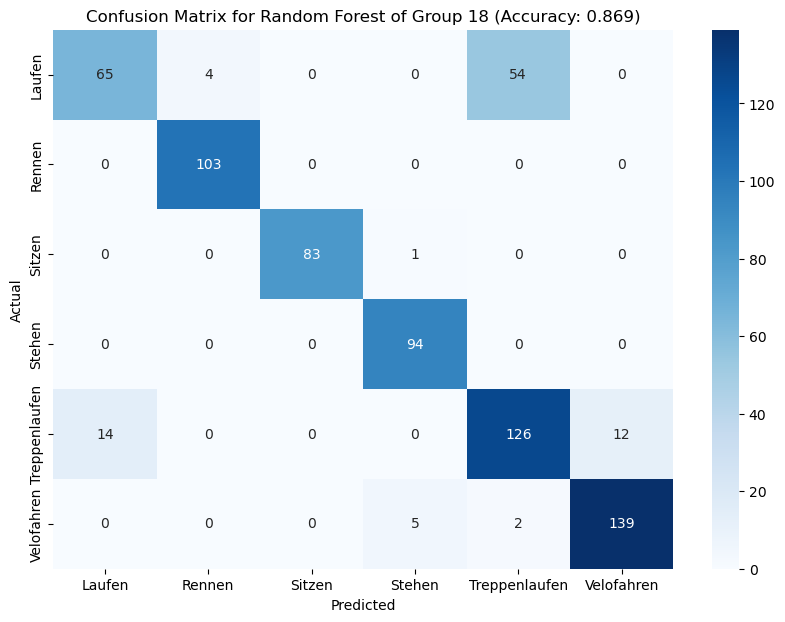

In [37]:
rdf_cm.fit(X_18_train_false, y_18_train_false)
y_pred_18 = rdf_cm.predict(X_18_test_false)
accuracy_18 = accuracy_score(y_18_test_false, y_pred_18)
cm_18 = confusion_matrix(y_18_test_false, y_pred_18)
df_cm_18 = pd.DataFrame(cm_18, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_18, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest of Group 18 (Accuracy: '+str(np.round(accuracy_18, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion Matrix of group 18 looks similar to that of group 17. The accuracy is minimally better 0.869 instead of 0.865. The distribution of predictions on the Confusion Matrix are diagonal and like group 17 there are a few wrong predictions.

In the Confusion Matrix you can see that the activities 'Treppenlaufen' and 'Laufen' are predicted wrong more often than the other activities. 'Laufen' is predicted here as 'Treppenlaufen' and vice versa. In addition, 'Treppenlaufen' is predicted as 'Velofahren'.

### 2.3.2 Feature Importance

To see which features are most important for our model, the Feature Importance of the best model is printed and analyzed. 

Additionally, the Feature Importance of the best model which has an unknown test user is printed.

In [38]:
rdf_fi =  RandomForestClassifier(bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=42)

To understand which features represent what, a list of the feature names is stored.

In [39]:
sensor_lst = ['Magnetometer', 'Accelerometer', 'Gyroscope', 'Gravity']
statistic_list = ['Mean', 'Standard Deviation', 'Minimum', 'Maximum']
axes = ['x', 'y', 'z']

feature_names = []
for statistic in statistic_list:
    for sensor in sensor_lst:
        for ax in axes:
            feature_names.append(ax + ' ' + sensor + ' ' + statistic)

feature_names

['x Magnetometer Mean',
 'y Magnetometer Mean',
 'z Magnetometer Mean',
 'x Accelerometer Mean',
 'y Accelerometer Mean',
 'z Accelerometer Mean',
 'x Gyroscope Mean',
 'y Gyroscope Mean',
 'z Gyroscope Mean',
 'x Gravity Mean',
 'y Gravity Mean',
 'z Gravity Mean',
 'x Magnetometer Standard Deviation',
 'y Magnetometer Standard Deviation',
 'z Magnetometer Standard Deviation',
 'x Accelerometer Standard Deviation',
 'y Accelerometer Standard Deviation',
 'z Accelerometer Standard Deviation',
 'x Gyroscope Standard Deviation',
 'y Gyroscope Standard Deviation',
 'z Gyroscope Standard Deviation',
 'x Gravity Standard Deviation',
 'y Gravity Standard Deviation',
 'z Gravity Standard Deviation',
 'x Magnetometer Minimum',
 'y Magnetometer Minimum',
 'z Magnetometer Minimum',
 'x Accelerometer Minimum',
 'y Accelerometer Minimum',
 'z Accelerometer Minimum',
 'x Gyroscope Minimum',
 'y Gyroscope Minimum',
 'z Gyroscope Minimum',
 'x Gravity Minimum',
 'y Gravity Minimum',
 'z Gravity Minim

The order of the variables was defined based on the get_features() function and the 2_data_preprocessing file.

In [40]:
rdf_fi.fit(X_14_train_false, y_14_train_false)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, random_state=42)

In [41]:
#Get feature importance
feature_importance = rdf_fi.feature_importances_
feature_importance

array([0.01350085, 0.01598416, 0.0108283 , 0.00919502, 0.01086798,
       0.01737453, 0.00295061, 0.00561597, 0.00431682, 0.01780043,
       0.03061831, 0.02803406, 0.01534302, 0.0083621 , 0.0163079 ,
       0.0338517 , 0.04619829, 0.02841565, 0.02022782, 0.02885088,
       0.02986553, 0.02414816, 0.020519  , 0.01743723, 0.00765801,
       0.01773377, 0.01153265, 0.02490048, 0.02597001, 0.02680113,
       0.02127984, 0.02774469, 0.02036627, 0.01450845, 0.03742972,
       0.04430855, 0.00995521, 0.01959482, 0.0116164 , 0.02528149,
       0.03706852, 0.02113078, 0.02131901, 0.01814536, 0.02478189,
       0.01842294, 0.0286474 , 0.02718828])

In [42]:
#create dataframe with feature names and feature importance
feature_importance_df_rdf_14 = pd.DataFrame({'Feature Name': feature_names, 'Feature Importance': feature_importance})
feature_importance_df_rdf_14.sort_values(by=['Feature Importance'], ascending=True, inplace=True)

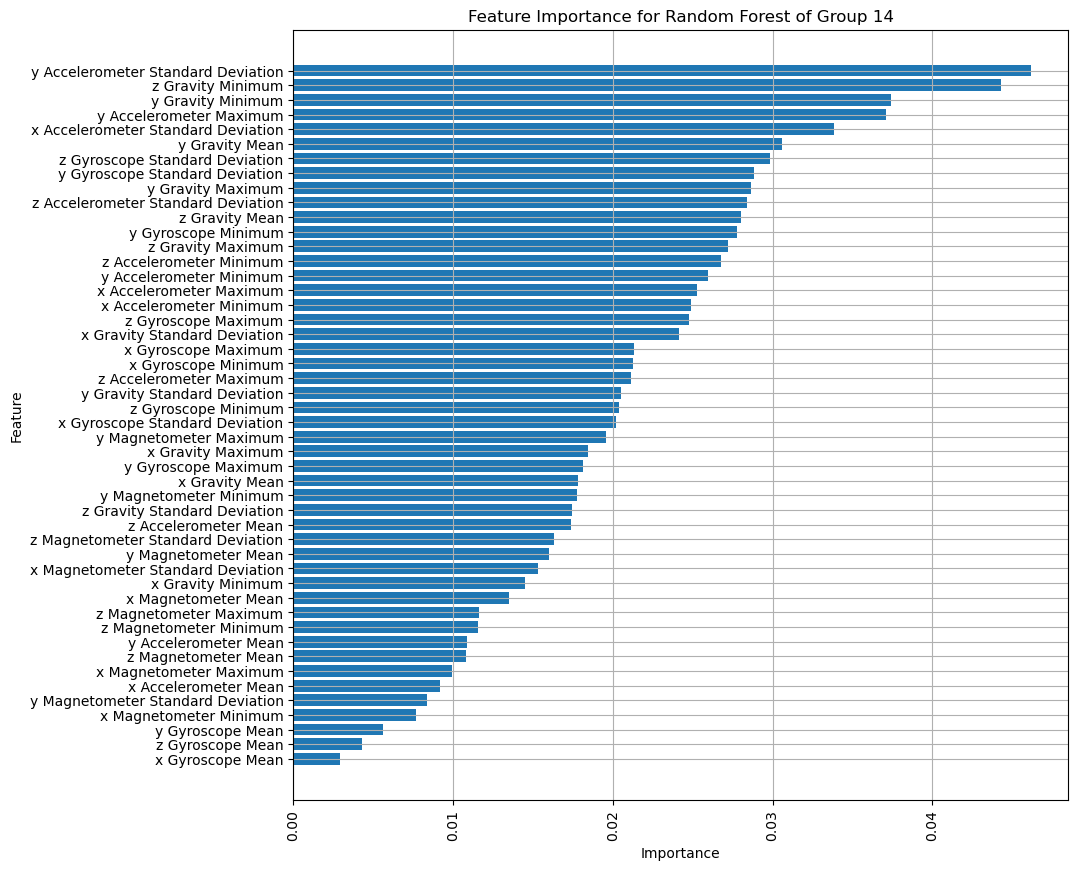

In [43]:
# Plotting feature importance
plt.figure(figsize=(10,10))
plt.barh(feature_importance_df_rdf_14['Feature Name'], feature_importance_df_rdf_14['Feature Importance'])
plt.title('Feature Importance for Random Forest of Group 14')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.grid()
plt.show()

The Feature Importance was plotted and offset with the respective names. You can see that the most important feature of the model with the best performance is the 'y Accelerometer Standard Devition'. The second most important feature is the 'z Gravity Minumum'. 

In the plot you can see that all variables are used for classification and therefore also relevant for decision making. 

It is notable that many of the mean values have a small importance in the model.

As mentioned above, the Feature Importance for the best model for an unknown test user is now shown.

In [44]:
rdf_fi_18 =  RandomForestClassifier(bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=42)

In [45]:
rdf_fi_18.fit(X_18_train_false, y_18_train_false)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, random_state=42)

In [46]:
feature_importance_18 = rdf_fi_18.feature_importances_
feature_importance_18

array([0.0114089 , 0.01974613, 0.01294031, 0.00544285, 0.00805387,
       0.01477784, 0.00206559, 0.00202776, 0.00349626, 0.01877105,
       0.03007806, 0.03226548, 0.01038993, 0.00807825, 0.01851241,
       0.03741252, 0.05132638, 0.03650959, 0.01601574, 0.02538415,
       0.02080323, 0.02011171, 0.0197838 , 0.01542356, 0.00616083,
       0.0150284 , 0.00969059, 0.02466066, 0.01984336, 0.02936963,
       0.02103412, 0.02784861, 0.02374675, 0.01819968, 0.03311193,
       0.04810425, 0.01191194, 0.01968681, 0.01408977, 0.02906525,
       0.04534034, 0.02723993, 0.01875168, 0.0197375 , 0.02560141,
       0.01663549, 0.02476992, 0.02954581])

In [47]:
#create dataframe with feature names and feature importance
feature_importance_df_rdf_18 = pd.DataFrame({'Feature Name': feature_names, 'Feature Importance': feature_importance_18})
feature_importance_df_rdf_18.sort_values(by=['Feature Importance'], ascending=True, inplace=True)

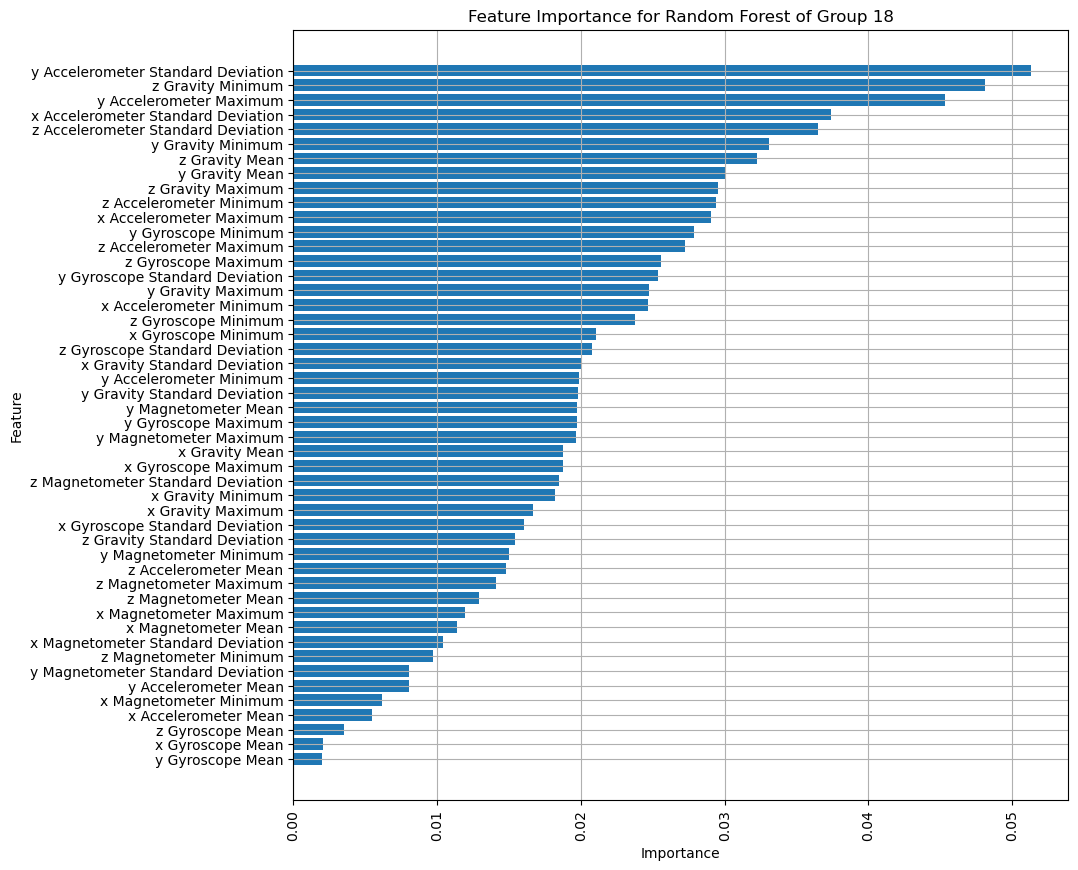

In [48]:
# Plotting feature importance
plt.figure(figsize=(10,10))
plt.barh(feature_importance_df_rdf_18['Feature Name'], feature_importance_df_rdf_18['Feature Importance'])
plt.title('Feature Importance for Random Forest of Group 18')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.grid()
plt.show()

A similar picture as for the Feature Importance of the group with a mixed test set can be seen for the Feature Importance for the group of an unknown test user. 

Also here the variable 'y Accelerometer Standard Devition' has the highest importance and the variable 'z Gravity Minumum' the second highest. 

The difference here is that the third most important variable is clearly visible, in comparison to the model of group 14, where you have to analyze the values to see which is the third most important variable.

It is notable that most of the mean values have a small importance in the model.

### 2.4 Summary Random Forest

The model performs much better when the data of all users are mixed instead when one user alone is in the testset. 

The best classification with the Random Forest model is obtained for group 14 with a mean test accuracy of 0.99, which has a training dataset where the users are also in the test dataset and the windows are 4 seconds long with 50% overlap and as many windows as possible. This model needs 1.15 seconds to fit the train data and 0.032 seconds to predict the test data. 

The worst classification is that of group 3, with a mean test accuracy of 0.33, which has an unknown test user and the data are divided into 2 second long windows with no overlap and with fixed 8 windows per measurement. This model needs 0.256 seconds to fit the train data and 0.012 seconds to predict the test data. 

The classifications of groups 17 and 18, which have an additional user and this was taken as the test user, also perform very well with a test accuracy of ~0.86. The model takes 0.362 seconds to fit the data of group 17 and 0.011 seconds to predict the data of group 17. For group 18 the fitting of the model takes 3.118 seconds and the prediction takes 0.014 seconds.

The Feature Importance depends on which group is trained. Whereas for the best Random Forest model and for the best Random Forest model with an unknown test user the Feature Importance looks similar. For both models the two most important features are the same. However, there are some differences in the Feature Importance of the two models. 

The following conclusions can be drawn from the classification using the Random Forest:

- The model performs best when the test users are also preserved in the training data.

- The model performs at different speeds, the more data available in the training, the longer the fitting takes.

- The model needs 4 seconds long windows for the best performance whereas the difference between the accuracies of group 13 which has 2 seconds long windows and group 14 which has 4 seconds long windows is very small.

## 3. Support Vector Machine Classification SVC

SVC searches for a hyperplane that divides the data points of the different classes with the largest possible margin.

SVC explained in more detail works as follows. Data is entered which must be labeled. Then a hyperplane is defined randomly. Then the margin between the hyperplane and the next data point of each class is calculated, this margin is called the support vector.  The goal of SVC is to find a hyperplane that reduces the cost of misclassification while maximizing the margin.

https://www.geeksforgeeks.org/support-vector-machine-algorithm/

In [49]:
from sklearn.svm import SVC

In [50]:
#Get SVC default parameters
svc = SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

All default parameters were printed.

### 3.1 Check of Datasets

To check which datasets perform better on a default model, the function of check_accuracy() is changed to use the SVC default model. 

Afterwards the mean values are compared and the dataset which performs better is taken.

In [51]:
svc = SVC(C= 1.0, break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
          gamma= 'scale', kernel= 'rbf', max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)


def check_accuracy_svc(features):
    '''
    This function takes in a list of features and returns the mean accuracy of the training and test sets
        
    '''
    accuracy_test = []
    accuracy_train = []
    for feature in features:
        svc.fit(feature[0], feature[2])
        pred_train = svc.predict(feature[0])
        pred_test = svc.predict(feature[1])
        accuracy_train.append(accuracy_score(feature[2], pred_train))
        accuracy_test.append(accuracy_score(feature[3], pred_test))
    return np.mean(accuracy_train), np.mean(accuracy_test)

The same two list will be used as for the check of the performance of the Random Forest.

In [52]:
axes_calculated = check_accuracy_svc(all_features)
axes_not_calculated = check_accuracy_svc(not_all_features)

In [53]:
print("Train accuracy with axis calculated together for all sensors: ", axes_calculated[0])
print("Test accuracy with axis calculated together for all sensors: ", axes_calculated[1])

Train accuracy with axis calculated together for all sensors:  0.9692984975850093
Test accuracy with axis calculated together for all sensors:  0.6120573992243753


In [54]:
print("Train accuracy with axis not calculated together for all sensors: ", axes_not_calculated[0])
print("Test accuracy with axis not calculated together for all sensors: ", axes_not_calculated[1])

Train accuracy with axis not calculated together for all sensors:  0.9757671317999088
Test accuracy with axis not calculated together for all sensors:  0.6276466743699801


As can be seen in the accuracies of the different data sets, for the SVC model the data are better suited which do not have the axes of the sensors calculated together. Compared to the Random Forest, the difference between the accuracies of the two data sets is very small.

For the further procedure we will use the data which did not calculate the axes together.

The function get_scores() will be used for SVC.

In [55]:
svc = SVC(C= 1.0, break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
          gamma= 'scale', kernel= 'rbf', max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

train_accuracy_svc, test_accuracy_svc = get_scores(not_all_features, svc)

Group  1
Train accuracy: 96.51%
Test accuracy: 28.50%
Time to train:  0.02 seconds
Time to test:  0.023 seconds
Group  2
Train accuracy: 96.37%
Test accuracy: 35.50%
Time to train:  0.038 seconds
Time to test:  0.043 seconds
Group  3
Train accuracy: 95.36%
Test accuracy: 26.75%
Time to train:  0.039 seconds
Time to test:  0.034 seconds
Group  4
Train accuracy: 97.48%
Test accuracy: 25.62%
Time to train:  0.085 seconds
Time to test:  0.095 seconds
Group  5
Train accuracy: 94.64%
Test accuracy: 90.97%
Time to train:  0.009 seconds
Time to test:  0.007 seconds
Group  6
Train accuracy: 95.69%
Test accuracy: 94.44%
Time to train:  0.021 seconds
Time to test:  0.018 seconds
Group  7
Train accuracy: 96.91%
Test accuracy: 92.36%
Time to train:  0.023 seconds
Time to test:  0.02 seconds
Group  8
Train accuracy: 97.47%
Test accuracy: 95.31%
Time to train:  0.06 seconds
Time to test:  0.061 seconds
Group  9
Train accuracy: 98.61%
Test accuracy: 24.55%
Time to train:  0.233 seconds
Time to test:  

In [56]:
# Train and test accuracy to dataframe
train_accuracy_table_svc = pd.DataFrame(train_accuracy_svc)
train_accuracy_table_svc.columns = ['Train Accuracy']
train_accuracy_table_svc['group'] = train_accuracy_table_svc.index + 1
test_accuracy_table_svc = pd.DataFrame(test_accuracy_svc)
test_accuracy_table_svc.columns = ['Test Accuracy']
test_accuracy_table_svc['group'] = test_accuracy_table_svc.index + 1

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_table_svc['group'], train_accuracy_table_svc['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table_svc['group'], test_accuracy_table_svc['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for SVC')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

The test accuracy curve of SVC looks very similar to the test accuracy curve of Random Forest. It is also noticeable that the groups which have an independent test user perform significantly worse than the groups in which the test and training data consist of mixed measurements of the users.

Groups 17 and 18 perform relatively well compared to the other groups with an independent test user, despite having also an independent test user themselves.

The training accuracy is linear even before GridSearch, which was not the case with Random Forest.  

### 3.2 GridSearch SVC

A GridSearch will be performed on the SVC model. For this purpose, group 6 is used, since it has a lower train accuracy value in the plot and the difference between the test and train accuracy is not so large.

In [58]:
param_grid_svc = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'decision_function_shape':['ovo']}

grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_grid_svc,
                            cv = 3, n_jobs = -1, verbose = 2, return_train_score=True, scoring='accuracy')       
grid_search_svc.fit(X_6_train_false, y_6_train_false)
grid_search_svc.best_params_
best_grid_svc = grid_search_svc.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


The parameters of the GridSearch mean:

- C is a regularization parameter. The regularization is l2 squared

- gamma is the kernel coefficient which is only used for 'rbf', 'poly' and 'sigmoid'.

- Kernel defines the kernel type used in the model.

- decision_function_shape defines that the classification is one vs. one

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [59]:
print(grid_search_svc.best_params_)
print(grid_search_svc.best_estimator_)
print(grid_search_svc.best_score_)

{'C': 100, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
0.9959349593495935


In [60]:
svc_gd = SVC(C= 100, gamma= 0.01, kernel= 'rbf',break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
             max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

train_accuracy_svc_gd, test_accuracy_svc_gd = get_scores(not_all_features, svc_gd)

Group  1
Train accuracy: 100.00%
Test accuracy: 37.00%
Time to train:  0.015 seconds
Time to test:  0.01 seconds
Group  2
Train accuracy: 100.00%
Test accuracy: 45.50%
Time to train:  0.024 seconds
Time to test:  0.017 seconds
Group  3
Train accuracy: 100.00%
Test accuracy: 36.75%
Time to train:  0.024 seconds
Time to test:  0.02 seconds
Group  4
Train accuracy: 99.93%
Test accuracy: 33.62%
Time to train:  0.048 seconds
Time to test:  0.028 seconds
Group  5
Train accuracy: 100.00%
Test accuracy: 96.53%
Time to train:  0.007 seconds
Time to test:  0.003 seconds
Group  6
Train accuracy: 100.00%
Test accuracy: 98.96%
Time to train:  0.014 seconds
Time to test:  0.008 seconds
Group  7
Train accuracy: 100.00%
Test accuracy: 97.22%
Time to train:  0.014 seconds
Time to test:  0.009 seconds
Group  8
Train accuracy: 100.00%
Test accuracy: 98.26%
Time to train:  0.032 seconds
Time to test:  0.019 seconds
Group  9
Train accuracy: 99.99%
Test accuracy: 26.75%
Time to train:  0.108 seconds
Time to

In [61]:
# Train and test accuracy to dataframe
train_accuracy_table_svc_gd = pd.DataFrame(train_accuracy_svc_gd)
train_accuracy_table_svc_gd.columns = ['Train Accuracy']
train_accuracy_table_svc_gd['group'] = train_accuracy_table_svc_gd.index + 1
test_accuracy_table_svc_gd = pd.DataFrame(test_accuracy_svc_gd)
test_accuracy_table_svc_gd.columns = ['Test Accuracy']
test_accuracy_table_svc_gd['group'] = test_accuracy_table_svc_gd.index + 1

In [62]:
# Plot train and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_table_svc_gd['group'], train_accuracy_table_svc_gd['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table_svc_gd['group'], test_accuracy_table_svc_gd['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for SVC with GridSearch')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

A clear overfitting can be seen in the data. Test accuracies of the groups which have independent test users have decreased despite increasing training accuracy. 

Accuracies have improved which were already very good before GridSearch. 

A GridSearch will be performed again but now with group 17 to see if there is an improvement.

In [63]:
param_grid_svc_17 = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid_search_svc_17 = GridSearchCV(estimator = svc, param_grid = param_grid_svc,
                            cv = 3, n_jobs = -1, verbose = 2, return_train_score=True, scoring='accuracy')       
grid_search_svc_17.fit(X_17_train_false, y_17_train_false)
grid_search_svc_17.best_params_
best_grid_svc = grid_search_svc_17.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [64]:
print(grid_search_svc_17.best_params_)
print(grid_search_svc_17.best_estimator_)
print(grid_search_svc_17.best_score_)

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
0.9974747474747474


In [65]:
svc_gd_17 = SVC(C= 10, gamma= 0.1, kernel= 'rbf',break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
             max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

train_accuracy_svc_gd_17, test_accuracy_svc_gd_17 = get_scores(not_all_features, svc_gd_17)

Group  1
Train accuracy: 100.00%
Test accuracy: 46.00%
Time to train:  0.021 seconds
Time to test:  0.008 seconds
Group  2
Train accuracy: 100.00%
Test accuracy: 46.00%
Time to train:  0.052 seconds
Time to test:  0.022 seconds
Group  3
Train accuracy: 100.00%
Test accuracy: 46.00%
Time to train:  0.042 seconds
Time to test:  0.018 seconds
Group  4
Train accuracy: 100.00%
Test accuracy: 46.00%
Time to train:  0.1 seconds
Time to test:  0.052 seconds
Group  5
Train accuracy: 100.00%
Test accuracy: 96.53%
Time to train:  0.014 seconds
Time to test:  0.005 seconds
Group  6
Train accuracy: 100.00%
Test accuracy: 98.26%
Time to train:  0.035 seconds
Time to test:  0.017 seconds
Group  7
Train accuracy: 100.00%
Test accuracy: 96.88%
Time to train:  0.04 seconds
Time to test:  0.022 seconds
Group  8
Train accuracy: 100.00%
Test accuracy: 98.96%
Time to train:  0.146 seconds
Time to test:  0.054 seconds
Group  9
Train accuracy: 100.00%
Test accuracy: 32.73%
Time to train:  0.403 seconds
Time t

In [66]:
# Train and test accuracy to dataframe
train_accuracy_table_svc_gd_17 = pd.DataFrame(train_accuracy_svc_gd_17)
train_accuracy_table_svc_gd_17.columns = ['Train Accuracy']
train_accuracy_table_svc_gd_17['group'] = train_accuracy_table_svc_gd_17.index + 1
test_accuracy_table_svc_gd_17 = pd.DataFrame(test_accuracy_svc_gd_17)
test_accuracy_table_svc_gd_17.columns = ['Test Accuracy']
test_accuracy_table_svc_gd_17['group'] = test_accuracy_table_svc_gd_17.index + 1

In [67]:
# Plot train and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_table_svc_gd_17['group'], train_accuracy_table_svc_gd_17['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table_svc_gd_17['group'], test_accuracy_table_svc_gd_17['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for SVC with GridSearch')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

After GridSearch with group 17, all groups were trained and evaluated on the adapted model. An improvement of the accuracies can be seen in the groups 1-4 which have slightly increased compared to the previous model. 

Otherwise, no improvement can be seen. 

To be sure, the results of both models are compared for test accuracy.

In [68]:
# Create new dataframe for the results for each group
results_svc = pd.DataFrame({'Group': range(1, 19), 'SVC with GridSearch on group 6': test_accuracy_table_svc_gd['Test Accuracy'], 'SVC with GridSearch on group 17': test_accuracy_table_svc_gd_17['Test Accuracy']})
results_svc['Difference'] = results_svc['SVC with GridSearch on group 6'] - results_svc['SVC with GridSearch on group 17']
results_svc


Group  SVC with GridSearch on group 6  SVC with GridSearch on group 17  \
0       1                        0.370000                         0.460000   
1       2                        0.455000                         0.460000   
2       3                        0.367500                         0.460000   
3       4                        0.336250                         0.460000   
4       5                        0.965278                         0.965278   
5       6                        0.989583                         0.982639   
6       7                        0.972222                         0.968750   
7       8                        0.982639                         0.989583   
8       9                        0.267465                         0.327345   
9      10                        0.285714                         0.257143   
10     11                        0.104854                         0.145631   
11     12                        0.109091                         0.108108   
12     13                        0.997642                         0.992925   
13     14                        0.998808                         0.997020   
14     15                        0.994749                         0.990665   
15     16                        0.995601                         0.995601   
16     17                        0.713542                         0.661458   
17     18                        0.602564                         0.605413   

    Difference  
0    -0.090000  
1    -0.005000  
2    -0.092500  
3    -0.123750  
4     0.000000  
5     0.006944  
6     0.003472  
7    -0.006944  
8    -0.059880  
9     0.028571  
10   -0.040777  
11    0.000983  
12    0.004717  
13    0.001788  
14    0.004084  
15    0.000000  
16    0.052083  
17   -0.002849

In the table you can see that the differences are very small except for group 3 and 4 where the difference is ~0.1 in accuracy. The model which has done the GridSearch on group 6 performs better than the model with the parameters of the GridSearch which is done on group 17.

The model used for the further tasks is the default model with the adjusted parameters:
- C= 100
- gamma= 0.01
- kernel= 'rbf

#### 3.2.1 Results

In this section we will fit and evaluate the best and worst group on the SVC model.

The model for fitting is the default model with the adjusted parameters:
- C= 100
- gamma= 0.01
- kernel= 'rbf

In [69]:
#Get best and worst test accuracy
display("Highest test accuracy:", test_accuracy_table_svc_gd[test_accuracy_table_svc_gd['Test Accuracy'] == test_accuracy_table_svc_gd['Test Accuracy'].max()])
display("Lowest test accuracy:", test_accuracy_table_svc_gd[test_accuracy_table_svc_gd['Test Accuracy'] == test_accuracy_table_svc_gd['Test Accuracy'].min()])

'Highest test accuracy:'

Test Accuracy  group
13       0.998808     14

'Lowest test accuracy:'

Test Accuracy  group
10       0.104854     11

The model performs best when the group 14 has been trained and then tested. Although the GridSearch was performed with group 6.

The model performs worst with group 11. 

Now the models with the best and the worst group are trained and then the Confusion Matrixes are plotted.

In [70]:
svc_cm = SVC(C= 100, gamma= 0.01, kernel= 'rbf',break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
             max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

In [71]:
svc_cm.fit(X_14_train_false, y_14_train_false)
y_pred_14_svc = svc_cm.predict(X_14_test_false)
accuracy_14_svc = accuracy_score(y_14_test_false, y_pred_14_svc)
cm_14_svc = confusion_matrix(y_14_test_false, y_pred_14_svc)
df_cm_14_svc = pd.DataFrame(cm_14_svc, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_14_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC of Group 14 (Accuracy: '+str(np.round(accuracy_14_svc, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

An optimal diagonal distribution of predictions in the Confusion Matrix can be seen. The model performs with an accuracy of 0.99.

In [72]:
svc_cm.fit(X_11_train_false, y_11_train_false)
y_pred_11_svc = svc_cm.predict(X_11_test_false)
accuracy_11_svc = accuracy_score(y_11_test_false, y_pred_11_svc)
cm_11_svc = confusion_matrix(y_11_test_false, y_pred_11_svc)
df_cm_11_svc = pd.DataFrame(cm_11_svc, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_11_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC of Group 11 (Accuracy: '+str(np.round(accuracy_11_svc, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

For group 11, there are many false predictions, which also confirms the accuracy of 0.105. 

It is striking that 'Velofahren' is always predicted incorrectly. 

In addition to the best and worst group, groups 17 and 18 will be shown in a Confusion Matrix. 

These two groups have one more user who has recorded all activities. This new user was used as a test user.   

In [73]:
svc_cm.fit(X_17_train_false, y_17_train_false)
y_pred_17_svc = svc_cm.predict(X_17_test_false)
accuracy_17_svc = accuracy_score(y_17_test_false, y_pred_17_svc)
cm_17_svc = confusion_matrix(y_17_test_false, y_pred_17_svc)
df_cm_17_svc = pd.DataFrame(cm_17_svc, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_17_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC of Group 17 (Accuracy: '+str(np.round(accuracy_17_svc, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In the Confusion Matrix of group 17, a slight diagonal distribution can be seen, but there are some misclassifications as can be seen in the Confusion Matrix.

Compared to the Random Forest model, the SVC performs slightly worse ~0.15 on this group.

In contrast to the Random Forest Confusion Matrix of this group, it can be seen that here 'Treppenlaufen' is predicted as 'Laufen' and not reverse.

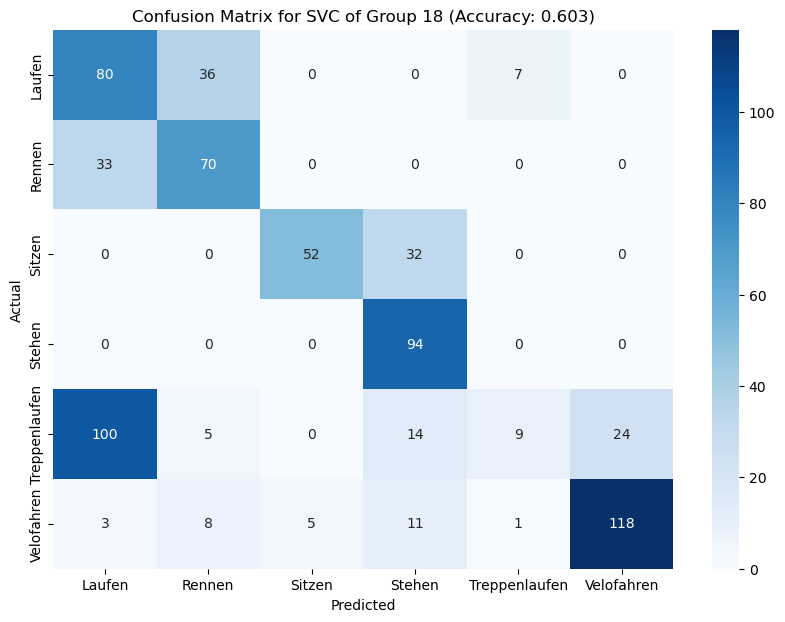

In [74]:
svc_cm.fit(X_18_train_false, y_18_train_false)
y_pred_18_svc = svc_cm.predict(X_18_test_false)
accuracy_18_svc = accuracy_score(y_18_test_false, y_pred_18_svc)
cm_18_svc = confusion_matrix(y_18_test_false, y_pred_18_svc)
df_cm_18_svc = pd.DataFrame(cm_18_svc, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_18_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC of Group 18 (Accuracy: '+str(np.round(accuracy_18_svc, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As in the Confusion Matrix of group 17, a diagonal distribution can be seen but with some false predictions. 

In comparison, the SVC also performs worse with ~0.25 in accuracy than the Random Forest model.

A few activities are predicted wrong, but 'Treppenlaufen' again is mostly predicted as 'Laufen'.

### 3.2.2 Feature Importance


To see which features are most important for our model, the Feature Importance of the best model is printed and analyzed. 

Additionally, the Feature Importance of the best model which has an unknown test user is printed.

Unlike Random Forest, SVC does not have an attribute that outputs the Feature Importance. To get the Feature Importance we will need the permutation_importance from sklearn.

To apply this, a model must be fitted with the appropriate data, and a baseline metric is calculated for the same data. Then permutation_importance is applied. One feature after the other is permuted after each permutation the metric is calculated. Permutation Importance is represented by the difference between the baseline metric and the calculated permuted metric. Permutation changes the result and therefore it can be highlighted which features have a larger or smaller impact on the model.

The results of Permutation Importance can be interpreted as follows. If a value is high it means that this feature is important. By permuting this feature, the metric that was calculated became worse, so this feature has a great influence on the corresponding model. A low Permutation Importance value means that this feature is less important for this model.

It is possible that the Permutation Importance can also take negative values. This is the case when we obtain a better score after permuting features. For these features, the Permutation Importance is nonsensical because they have a negative impact on the prediction of the model.


https://scikit-learn.org/stable/modules/permutation_importance.html#id2

https://towardsdatascience.com/advanced-permutation-importance-to-explain-predictions-ead7de26eed4#:~:text=As%20a%20general%20reminder%2C%20it,can%20assume%20also%20negative%20values

In [75]:
svc_fi = SVC(C= 100, gamma= 0.01, kernel= 'rbf',break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
             max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

In [76]:
from sklearn.inspection import permutation_importance

svc_fi.fit(X_14_train_false, y_14_train_false)

# Calculate permutation importance
result = permutation_importance(svc_fi, X_14_train_false, y_14_train_false, n_repeats=5, random_state=42, scoring='accuracy')
feature_importance_svc_14 = result.importances_mean

# Print the feature importances
for i, importance in enumerate(feature_importance_svc_14):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.0016314779270633518
Feature 2: 0.0078055022392834236
Feature 3: 0.0009596928982725572
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 1.5994881637881874e-05
Feature 9: 0.0
Feature 10: 0.0017274472168906207
Feature 11: 0.0010076775431862028
Feature 12: 0.032325655790147144
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.0007837492002559232
Feature 17: 0.013147792706333993
Feature 18: 0.00124760076775432
Feature 19: 0.00015994881637875212
Feature 20: 0.01773832373640436
Feature 21: 0.002191298784388995
Feature 22: 0.0
Feature 23: 0.0
Feature 24: 0.0010076775431861363
Feature 25: 0.002399232245681371
Feature 26: 0.018586052463211766
Feature 27: 0.0013755598208573083
Feature 28: 0.0805022392834293
Feature 29: 0.047216890595009595
Feature 30: 0.07762316058861166
Feature 31: 0.02413627639155469
Feature 32: 0.025815738963531686
Feature 33: 0.012811900191938586
Feature 34: 0.008925143953934778
Feature 35: 0.01188419705694177
Feature 36: 0.03880

In [77]:
feature_importance_svc_14

array([1.63147793e-03, 7.80550224e-03, 9.59692898e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.59948816e-05,
       0.00000000e+00, 1.72744722e-03, 1.00767754e-03, 3.23256558e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.83749200e-04,
       1.31477927e-02, 1.24760077e-03, 1.59948816e-04, 1.77383237e-02,
       2.19129878e-03, 0.00000000e+00, 0.00000000e+00, 1.00767754e-03,
       2.39923225e-03, 1.85860525e-02, 1.37555982e-03, 8.05022393e-02,
       4.72168906e-02, 7.76231606e-02, 2.41362764e-02, 2.58157390e-02,
       1.28119002e-02, 8.92514395e-03, 1.18841971e-02, 3.88035829e-02,
       1.87140115e-03, 6.44593730e-03, 3.13499680e-03, 2.06174024e-02,
       1.46769034e-01, 8.50607806e-02, 1.19161868e-02, 1.40275112e-02,
       3.42130518e-02, 2.18650032e-02, 1.10204734e-02, 4.27543186e-02])

In [78]:
#create dataframe with feature names and feature importance
feature_importance_df_svc_14 = pd.DataFrame({'Feature Name': feature_names, 'Feature Importance': feature_importance_svc_14})
feature_importance_df_svc_14.sort_values(by=['Feature Importance'], ascending=True, inplace=True)

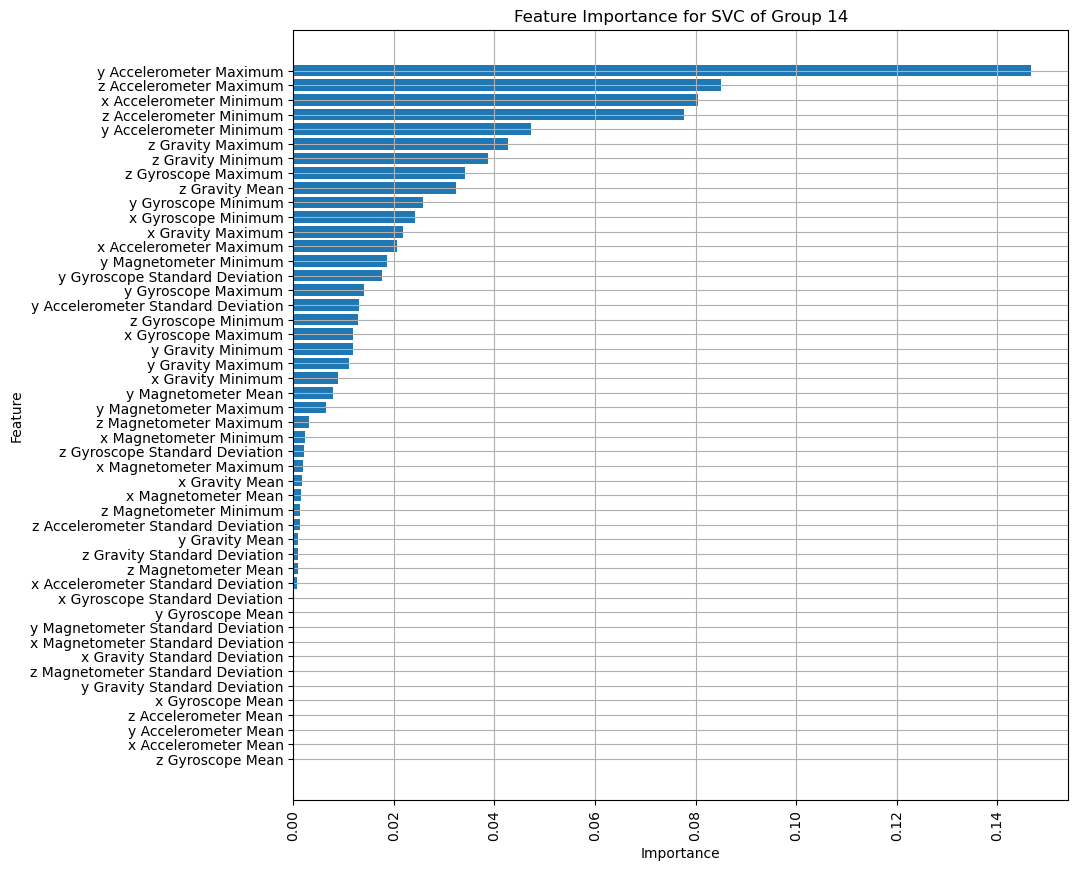

In [79]:
# Plotting feature importance
plt.figure(figsize=(10,10))
plt.barh(feature_importance_df_svc_14['Feature Name'], feature_importance_df_svc_14['Feature Importance'])
plt.title('Feature Importance for SVC of Group 14')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.grid()
plt.show()

The plot shows the Feature Importances of the SVC model that fits group 14. The three most important features for the model are y accelerometer maximum, z accelerometer maximum  and x accelerometer minimum. Also you can see that 10 features importances are set to 0 which means that if they permuted the score don't change of this model.

Interestingly, the statistical metrics mean and standard deviation have nearly no influence for this model, regardless of the sensor.

In [80]:
svc_fi_17 = SVC(C= 100, gamma= 0.01, kernel= 'rbf',break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
             max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

In [81]:
from sklearn.inspection import permutation_importance

svc_fi_17.fit(X_17_train_false, y_17_train_false)

# Calculate permutation importance
result_17 = permutation_importance(svc_fi_17, X_17_train_false, y_17_train_false, n_repeats=5, random_state=42, scoring='accuracy')
feature_importance_svc_17 = result_17.importances_mean

# Print the feature importances
for i, importance in enumerate(feature_importance_svc_17):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.003914141414141414
Feature 2: 0.005618686868686895
Feature 3: 0.0043560606060606185
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.00012626262626262984
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.00044191919191920447
Feature 11: 0.0035984848484848396
Feature 12: 0.016161616161616155
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.00612373737373737
Feature 18: 0.0035353535353535247
Feature 19: 0.00334595959595958
Feature 20: 0.010732323232323204
Feature 21: 0.0019570707070707184
Feature 22: 0.0
Feature 23: 0.0
Feature 24: 0.00012626262626262984
Feature 25: 0.003914141414141414
Feature 26: 0.016161616161616155
Feature 27: 0.004419191919191934
Feature 28: 0.07436868686868688
Feature 29: 0.035921717171717195
Feature 30: 0.09015151515151516
Feature 31: 0.015340909090909082
Feature 32: 0.04040404040404042
Feature 33: 0.01546717171717169
Feature 34: 0.007512626262626276
Feature 35: 0.03888888888888888
Feature 36: 0.0639520202020202
Feature

In [82]:
feature_importance_svc_17

array([3.91414141e-03, 5.61868687e-03, 4.35606061e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.26262626e-04, 0.00000000e+00,
       0.00000000e+00, 4.41919192e-04, 3.59848485e-03, 1.61616162e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.12373737e-03, 3.53535354e-03, 3.34595960e-03, 1.07323232e-02,
       1.95707071e-03, 0.00000000e+00, 0.00000000e+00, 1.26262626e-04,
       3.91414141e-03, 1.61616162e-02, 4.41919192e-03, 7.43686869e-02,
       3.59217172e-02, 9.01515152e-02, 1.53409091e-02, 4.04040404e-02,
       1.54671717e-02, 7.51262626e-03, 3.88888889e-02, 6.39520202e-02,
       4.10353535e-03, 4.16666667e-03, 5.05050505e-03, 6.33838384e-02,
       1.62247475e-01, 7.33585859e-02, 1.96969697e-02, 1.79292929e-02,
       4.96843434e-02, 7.57575758e-03, 1.17424242e-02, 4.09090909e-02])

In [83]:
#create dataframe with feature names and feature importance
feature_importance_df_svc_17 = pd.DataFrame({'Feature Name': feature_names, 'Feature Importance': feature_importance_svc_17})
feature_importance_df_svc_17.sort_values(by=['Feature Importance'], ascending=True, inplace=True)

In [84]:
# Plotting feature importance of group 17
plt.figure(figsize=(10,10))
plt.barh(feature_importance_df_svc_17['Feature Name'], feature_importance_df_svc_17['Feature Importance'])
plt.title('Feature Importance for SVC of Group 17')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.grid()
plt.show()


The plot shows the Feature Importances of the SVC model that fits group 17. The four most important features for the model are almost the same as for the previous model y Accelerometer Maximum, z Accelerometer Minimum, z Accelerometer Maximum and x Accelerometer Minimum. Again you can see that 10 features importances are set to 0 which means that if they permuted the score don't change of this model.

Again, it is notable that the statistical metrics mean and standard deviation have little to no impact on the prediction.

### 3.3 Summary SVC


The SVC model performs much better on the groups that have users in both the test and training datasets. 

A significant overfitting is observed with the SVC model as the training performance increases and the test performance decreases for the datasets with independent test users.

The best classification with the SVC model is obtained for group 14 with a test accuracy of 0.99. The group has a training dataset where the users are also included in the test dataset and the windows are 4 seconds long, with 50% overlap and as many windows as possible. This model takes 0.76 seconds to fit the train data and 0.22 seconds to predict the test data.

The worst classification is that of group 11 which achieves an accuracy of 0.105 which is very low. Group 11 consists of as many 2 seconds long windows as possible without overlap and with an independent test user. The model fits the data in 0.964 seconds and predicts it in 0.178 seconds.

The two groups 17 and 18 with an additional user whose recordings were used as a test set perform much better compared to the groups which have an independent test user. Groups 17 achieves an accuracy of ~0.7 and 18 achieves an accuracy of ~0.6 . Group 17 performs slightly better than group 18. Group 17 has 2 seconds long windows which overlap 50%, there are exactly 16 windows per measurement, a new additional user was added and his measurements were used as test set, all measurements of the other users are in the training set. This model takes 0.046 seconds to fit the train data and 0.008 seconds to predict the test data.

The Feature Importance of the two models shown looks quite similar. It is noticeable that the statistical metrics mean and standard deviation have little to no influence on the prediction. The most important sensor for both models is a variation of the Accelerometer.

We can draw the following results from the classification using SVC.

- The model performs very well on groups that have all users in the test and training data.

- The model overfits.

- The model performs better on data with a longer window (4 seconds). However, the difference in performance between the same conditions of the data (overlap, test users and number of windows) with different length (2 or 4 seconds) of the windows is minimal.

## 4. Conclusion

To compare the two models, the results are entered into a table and the table is then displayed.

In [85]:
#Table created to compare the accuracy of SVC and Random Forest
results = pd.DataFrame({'Group': range(1, 19), 'Best SVC Model': test_accuracy_table_svc_gd['Test Accuracy'], 'Random Forest mean accuracy': table_accuracy_rand['Test Accuracy Mean']})
results['Difference'] = results['Best SVC Model'] - results['Random Forest mean accuracy']
results


Group  Best SVC Model  Random Forest mean accuracy  Difference
0       1        0.370000                     0.417000   -0.047000
1       2        0.455000                     0.423500    0.031500
2       3        0.367500                     0.334000    0.033500
3       4        0.336250                     0.371250   -0.035000
4       5        0.965278                     0.988889   -0.023611
5       6        0.989583                     0.977083    0.012500
6       7        0.972222                     0.965972    0.006250
7       8        0.982639                     0.984722   -0.002083
8       9        0.267465                     0.344910   -0.077445
9      10        0.285714                     0.356327   -0.070612
10     11        0.104854                     0.415728   -0.310874
11     12        0.109091                     0.420442   -0.311351
12     13        0.997642                     0.992453    0.005189
13     14        0.998808                     0.997378    0.001430
14     15        0.994749                     0.983664    0.011085
15     16        0.995601                     0.989912    0.005689
16     17        0.713542                     0.841667   -0.128125
17     18        0.602564                     0.867521   -0.264957

If you compare the two models SVC and Random Forest, you can see that the best group 14 performs almost the same for both models with a difference of 0.001. However, for the remaining groups Random Forest performs better than SVC, as an example one can take the groups 17 and 18 which achieve an accuracy of ~0.86 with Random Forest and ~0.6 with SVC. Groups 17 and 18 perform differently on the two models. In the SVC model, group 17 performs better, whereas in the Random Forest, group 18 performs better. The only difference in this group is the number of windows which is 16 or as many windows as possible. 

The Feature Importance of the two models is very different. This is also due to the fact that in Random Forest the corresponding attribute of the class was used and that in SVC this had to be calculated using Permutation Importance. Despite this difference, the most important features and the less important features can be read from both methods. In both models a variation of the 'Accelerometer' sensor is the most important feature. The Random Forest additionally evaluates a variation of the Gravity sensor as important whereas SVC and Permutation Importance interpret variations of the 'Accelerometer' sensor as important features. A big difference is that Random Forest interprets the features representing the standard deviation as important, whereas SVC interprets the features representing the standard deviation as unimportant.

With this study, the decision was made to use the Random Forest model in the comparison of Random Forest and SVC, because the Random Forest model is better suited for our data.

The best Random Forest model includes the following parameters:

- Bootstrap = True
- max_depth=10
- max_features=2
- min_samples_leaf=3
- min_samples_split=8
- n_estimators=100

All the following results were achieved on this model.

The best performance for known test users has the group 14. This group consists of the following:

- 4 seconds long windows
- 50% overlap of windows
- as many windows as possible per recording

With this group we get the following results:

- Mean train accuracy: 0.998433
- Mean test accuracy: 0.997378
- Time to predict: 0.032 seconds

In summary, with this data group, this model can predict data with an accuracy of 0.99702 within 0.032 seconds when the data windows are 4 seconds long.


The best performance for groups that had an unknown test user is group 18. This group consists of the following:

- 2 seconds long windows
- 50% overlap of windows
- As many windows as possible per recording
- A seventh unknown user representing the test set

With this group we get the following results:

- Mean train Accuracy: 0.996810
- Mean test accuracy: 0.867521
- Time to predict: 0.016 seconds

Even though in this group the new user is unknown, the results are very good.


Summarizing the chapter on non Deep Learning, it can be said that measurements of users that occur both in the test and in the training data are better predicted. Groups that have an unknown user as a test set perform worse, but even there there are very large differences in performance. The groups that received a seventh user perform very well on the Random Forest with a test accuracy of 0.86 which is quite high.

For further use, the Random Forest would be better than the SVC because it has better performance and predicts the data faster. The length of the recordings for prediction should be optimal at 4 seconds, but at 2 seconds you would already get good results.